In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/content/ndb-ufes.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   public_id            237 non-null    int64  
 1   lesion_id            237 non-null    int64  
 2   patient_id           237 non-null    int64  
 3   path                 237 non-null    object 
 4   localization         237 non-null    object 
 5   larger_size          237 non-null    float64
 6   tobacco_use          237 non-null    object 
 7   alcohol_consumption  237 non-null    object 
 8   sun_exposure         237 non-null    object 
 9   gender               237 non-null    object 
 10  skin_color           237 non-null    object 
 11  age_group            237 non-null    int64  
 12  diagnosis            237 non-null    object 
 13  dysplasia_severity   89 non-null     object 
 14  TaskII               237 non-null    object 
 15  TaskIII              237 non-null    obj

In [9]:
df.describe()

,public_id,lesion_id,patient_id,larger_size,age_group
count,237.000000,237.000000,237.000000,237.000000,237.000000
mean,118.000000,71.940928,59.345992,1.648101,1.405063
std,68.560193,47.023668,39.202518,1.435228,0.607558
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,36.000000,29.000000,0.400000,1.000000
50%,118.000000,68.000000,56.000000,1.500000,1.000000
75%,177.000000,95.000000,78.000000,2.500000,2.000000
max,236.000000,216.000000,183.000000,6.000000,2.000000


In [10]:
df.isnull().sum()

,0
public_id,0
lesion_id,0
patient_id,0
path,0
localization,0
larger_size,0
tobacco_use,0
alcohol_consumption,0
sun_exposure,0
gender,0


In [11]:
imputer = SimpleImputer(strategy='most_frequent')
# Reshape the output to be 1-dimensional
df['dysplasia_severity'] = imputer.fit_transform(df[['dysplasia_severity']]).ravel()

In [12]:

# Display the unique values before encoding
print("Unique values before encoding:")
print("Gender:", df['gender'].unique())
print("Diagnosis:", df['diagnosis'].unique())


Unique values before encoding:
Gender: ['M' 'F']
Diagnosis: ['OSCC' 'Leukoplakia with dysplasia' 'Leukoplakia without dysplasia']


In [13]:
# Initialize LabelEncoder
le = LabelEncoder()

In [14]:
# Apply Label Encoding to 'gender' and 'diagnosis'
df['gender'] = le.fit_transform(df['gender'])
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [15]:
# Display the unique values after encoding
print("\nUnique values after encoding:")
print("Gender:", df['gender'].unique())
print("Diagnosis:", df['diagnosis'].unique())



Unique values after encoding:
Gender: [1 0]
Diagnosis: [2 0 1]


In [16]:
df.head()

,public_id,lesion_id,patient_id,path,localization,larger_size,tobacco_use,alcohol_consumption,sun_exposure,gender,skin_color,age_group,diagnosis,dysplasia_severity,TaskII,TaskIII,TaskIV
0,0,50,48,0000.png,Tongue,2.0,Yes,No,No,1,Black,2,2,Mild,OSCC,Presence,OSCC
1,1,50,48,0001.png,Tongue,2.0,Yes,No,No,1,Black,2,2,Mild,OSCC,Presence,OSCC
2,2,41,39,0002.png,Tongue,2.5,Yes,Former,Yes,1,White,1,2,Mild,OSCC,Presence,OSCC
3,3,41,39,0003.png,Tongue,2.5,Yes,Former,Yes,1,White,1,2,Mild,OSCC,Presence,OSCC
4,4,87,81,0004.png,Lip,1.5,Former,Yes,Yes,0,White,2,2,Mild,OSCC,Presence,OSCC


In [17]:
# Display the unique values before encoding
print("Unique values before encoding:")
print("Localization:", df['localization'].unique())
print("Tobacco Use:", df['tobacco_use'].unique())
print("Alcohol Consumption:", df['alcohol_consumption'].unique())
print("Skin Color:", df['skin_color'].unique())

Unique values before encoding:
Localization: ['Tongue' 'Lip' 'Floor of mouth' 'Buccal mucosa' 'Palate' 'Gingiva']
Tobacco Use: ['Yes' 'Former' 'No' 'Not informed']
Alcohol Consumption: ['No' 'Former' 'Yes' 'Not informed']
Skin Color: ['Black' 'White' 'Not informed' 'Brown']


In [18]:
# Apply One-Hot Encoding to the specified columns
df = pd.get_dummies(df, columns=['localization', 'tobacco_use', 'alcohol_consumption', 'skin_color'], drop_first=True)

In [19]:
df.head()

,public_id,lesion_id,patient_id,path,larger_size,sun_exposure,gender,age_group,diagnosis,dysplasia_severity,...,localization_Tongue,tobacco_use_No,tobacco_use_Not informed,tobacco_use_Yes,alcohol_consumption_No,alcohol_consumption_Not informed,alcohol_consumption_Yes,skin_color_Brown,skin_color_Not informed,skin_color_White
0,0,50,48,0000.png,2.0,No,1,2,2,Mild,...,True,False,False,True,True,False,False,False,False,False
1,1,50,48,0001.png,2.0,No,1,2,2,Mild,...,True,False,False,True,True,False,False,False,False,False
2,2,41,39,0002.png,2.5,Yes,1,1,2,Mild,...,True,False,False,True,False,False,False,False,False,True
3,3,41,39,0003.png,2.5,Yes,1,1,2,Mild,...,True,False,False,True,False,False,False,False,False,True
4,4,87,81,0004.png,1.5,Yes,0,2,2,Mild,...,False,False,False,False,False,False,True,False,False,True


In [22]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Unique value counts in key categorical columns
# Updated list of columns to exclude those removed by one-hot encoding
for col in ['gender', 'diagnosis']:
    print(f"\n{col} unique values:\n", df[col].value_counts())

# Accessing the new one-hot encoded columns
# Example for 'localization'
print("\nlocalization unique values:")
for col in df.columns:
    if col.startswith('localization_'):
        print(f"{col}:", df[col].value_counts())
# Repeat for other one-hot encoded columns like 'tobacco_use', 'alcohol_consumption', and 'skin_color' as needed

Missing Values:
 public_id                           0
lesion_id                           0
patient_id                          0
path                                0
larger_size                         0
sun_exposure                        0
gender                              0
age_group                           0
diagnosis                           0
dysplasia_severity                  0
TaskII                              0
TaskIII                             0
TaskIV                              0
localization_Floor of mouth         0
localization_Gingiva                0
localization_Lip                    0
localization_Palate                 0
localization_Tongue                 0
tobacco_use_No                      0
tobacco_use_Not informed            0
tobacco_use_Yes                     0
alcohol_consumption_No              0
alcohol_consumption_Not informed    0
alcohol_consumption_Yes             0
skin_color_Brown                    0
skin_color_Not informed          

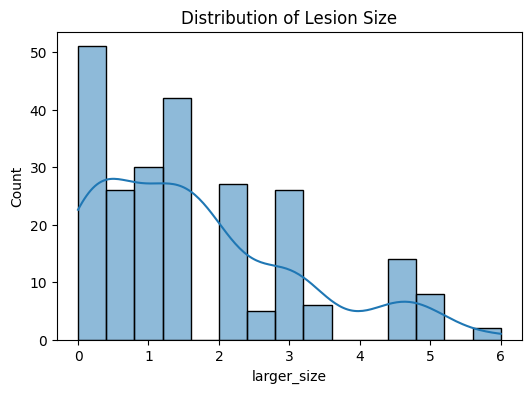

In [25]:
# Distribution of lesion size
plt.figure(figsize=(6, 4))
sns.histplot(df['larger_size'], kde=True, bins=15)
plt.title('Distribution of Lesion Size')
plt.show()


<ipython-input-26-f6d484ebade9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='viridis')


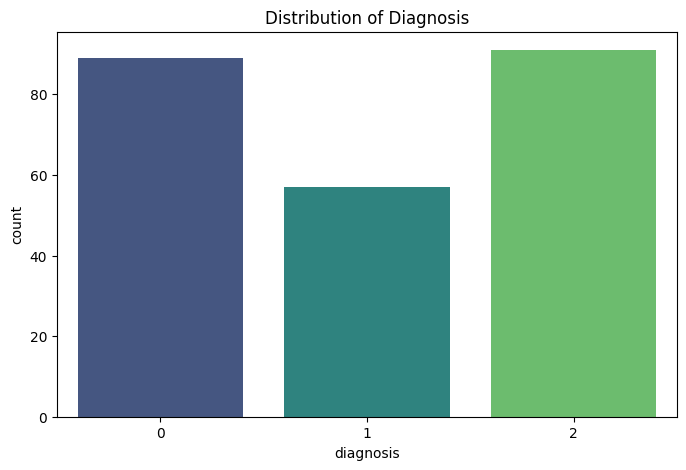

In [26]:
# Visualizing 'diagnosis'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='diagnosis', palette='viridis')
plt.title('Distribution of Diagnosis')
plt.show()


<ipython-input-27-1c15342d2f94>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


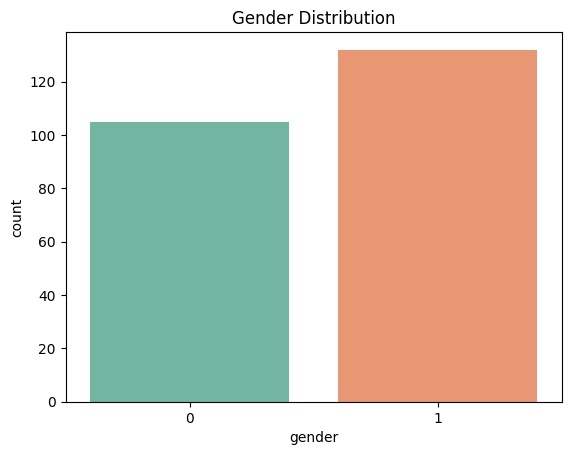

In [27]:
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()



<ipython-input-28-f6c36a26ff6d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dysplasia_severity', palette='coolwarm')


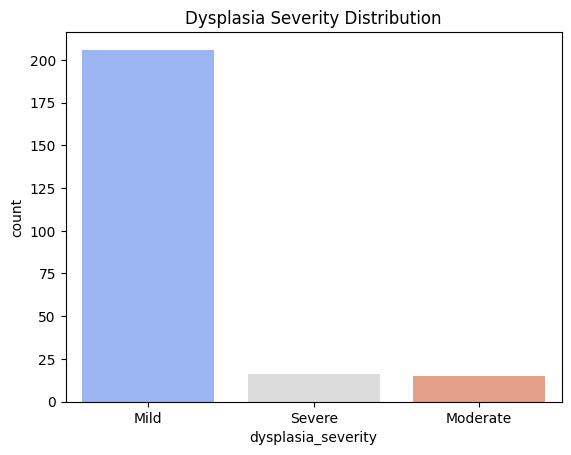

In [28]:
sns.countplot(data=df, x='dysplasia_severity', palette='coolwarm')
plt.title('Dysplasia Severity Distribution')
plt.show()


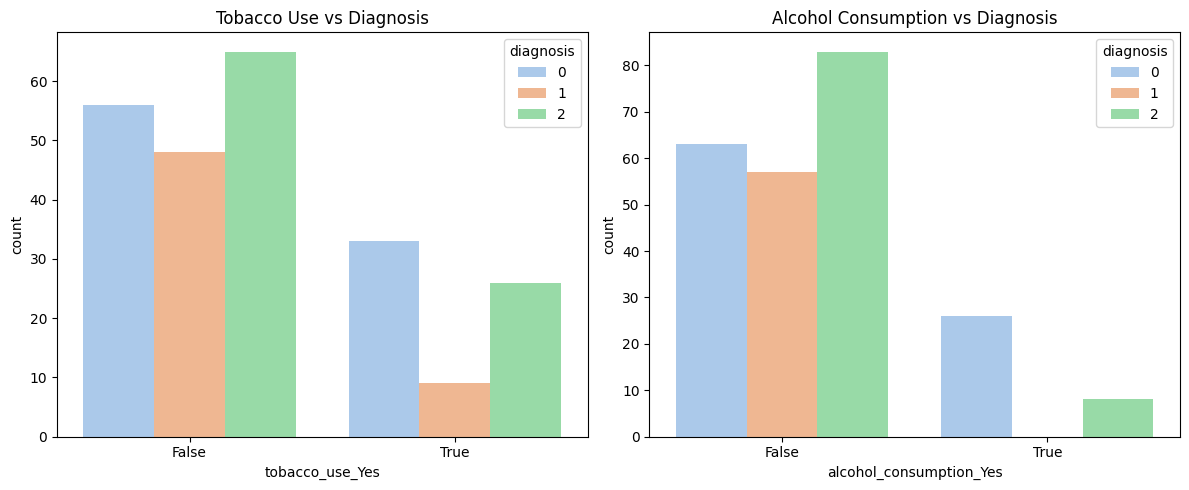

In [34]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='tobacco_use_Yes', hue='diagnosis', palette='pastel')
plt.title('Tobacco Use vs Diagnosis')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='alcohol_consumption_Yes', hue='diagnosis', palette='pastel')
plt.title('Alcohol Consumption vs Diagnosis')

plt.tight_layout()
plt.show()



In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale 'larger_size'
df['larger_size'] = scaler.fit_transform(df[['larger_size']])

# Confirm scaling
print(df[['larger_size']].describe())


        larger_size
count  2.370000e+02
mean   7.120418e-17
std    1.002116e+00
min   -1.150750e+00
25%   -8.714592e-01
50%   -1.034084e-01
75%    5.948195e-01
max    3.038617e+00


In [38]:
# Drop non-numeric or irrelevant columns
X = df.drop(['TaskII', 'TaskIII', 'TaskIV', 'path', 'public_id', 'lesion_id', 'patient_id'], axis=1)
y = df['TaskIV']  # Target column


In [39]:
# Encode categorical features if any
X = pd.get_dummies(X, drop_first=True)


In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: TaskIV
OSCC                             73
Leukoplakia with dysplasia       71
Leukoplakia without dysplasia    45
Name: count, dtype: int64
After SMOTE: TaskIV
Leukoplakia without dysplasia    73
OSCC                             73
Leukoplakia with dysplasia       73
Name: count, dtype: int64


In [41]:
print(X_train_resampled.dtypes)


larger_size                         float64
gender                                int64
age_group                             int64
diagnosis                             int64
localization_Floor of mouth            bool
localization_Gingiva                   bool
localization_Lip                       bool
localization_Palate                    bool
localization_Tongue                    bool
tobacco_use_No                         bool
tobacco_use_Not informed               bool
tobacco_use_Yes                        bool
alcohol_consumption_No                 bool
alcohol_consumption_Not informed       bool
alcohol_consumption_Yes                bool
skin_color_Brown                       bool
skin_color_Not informed                bool
skin_color_White                       bool
sun_exposure_Not informed              bool
sun_exposure_Yes                       bool
dysplasia_severity_Moderate            bool
dysplasia_severity_Severe              bool
dtype: object


In [42]:
from sklearn.model_selection import train_test_split

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 165
Validation set size: 36
Test set size: 36


In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode each target column
for col in ['TaskII', 'TaskIII', 'TaskIV']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df[['TaskII', 'TaskIII', 'TaskIV']].head())


   TaskII  TaskIII  TaskIV
0       1        1       2
1       1        1       2
2       1        1       2
3       1        1       2
4       1        1       2


In [44]:
# Save the processed data
df.to_csv('processed_ndb-ufes.csv', index=False)

print("✅ Processed data saved successfully!")


✅ Processed data saved successfully!
